# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
pip install pycaret

In [ ]:
df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [ ]:
df.drop(columns='index', inplace=True)
#df.drop_duplicates(keep='first', inplace=True)

# Passando a variável 'mau' para int
df['mau'] = df['mau'].astype(np.int64)

df = df.set_index('data_ref').copy()
df_test = df.last('3M')

index = df.shape[0] - df_test.shape[0]
df_train = df[:index]

<ipython-input-4-f5b2e340065d>:8: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_test = df.last('3M')


## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [ ]:
# Descrevendo a base quanto ao número de linhas e de maus pagadores por mês

tab = pd.crosstab(df_train['mau'], pd.PeriodIndex(df_train.index, freq='M'), margins=True, margins_name='Total')
tab.loc['Default%'] = (tab.loc[1]/tab.loc['Total'])*100
round(tab,1)

col_0,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,Total
mau,,,,,,,,,,,,,
0,43943.0,45066.0,46322.0,47337.0,48149.0,48487.0,48639.0,48523.0,48098.0,47396.0,46253.0,45144.0,563357.0
1,6057.0,4934.0,3678.0,2663.0,1851.0,1513.0,1361.0,1477.0,1902.0,2604.0,3747.0,4856.0,36643.0
Total,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,600000.0
Default%,12.1,9.9,7.4,5.3,3.7,3.0,2.7,3.0,3.8,5.2,7.5,9.7,6.1


In [ ]:
# Plotando gráficos

def plota1(variavel, data=df_test.copy()):
  if((data[variavel].nunique()>5) and (data[variavel].dtype != object)):
    data[variavel] = pd.cut(data[variavel],5).copy()
    data = data.reset_index(drop=True)

  plt.figure()
  g = sns.countplot(x=variavel,data=data)
  g.tick_params(labelrotation=45)

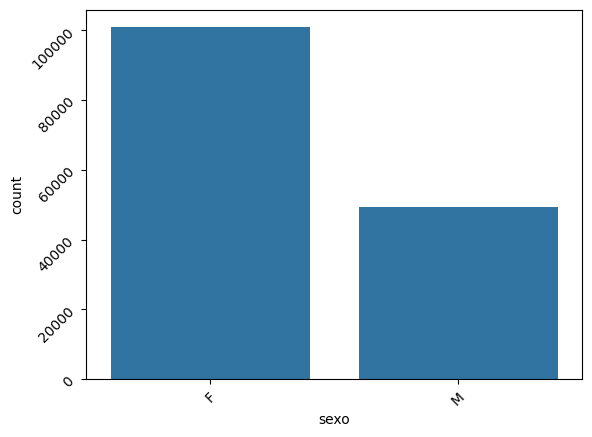

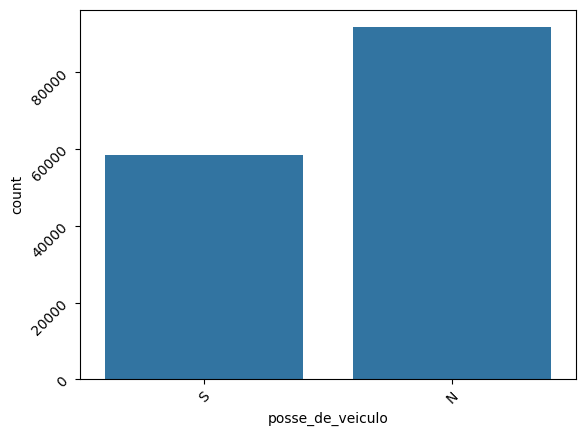

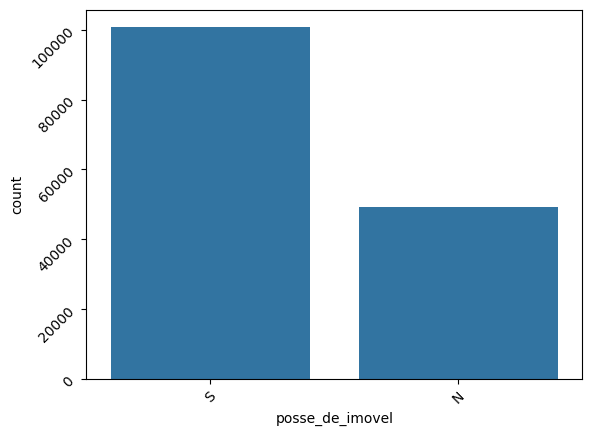

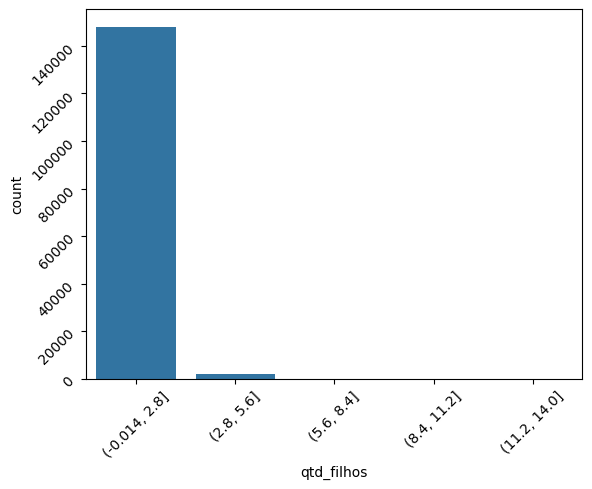

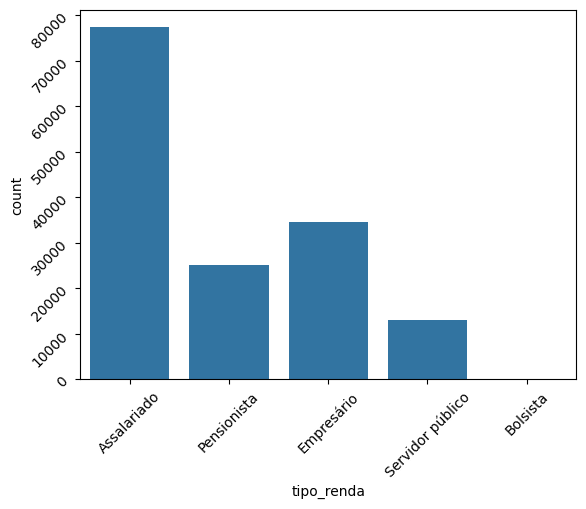

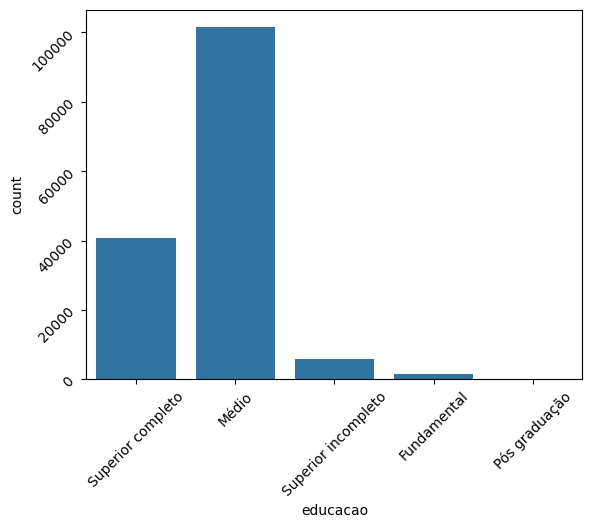

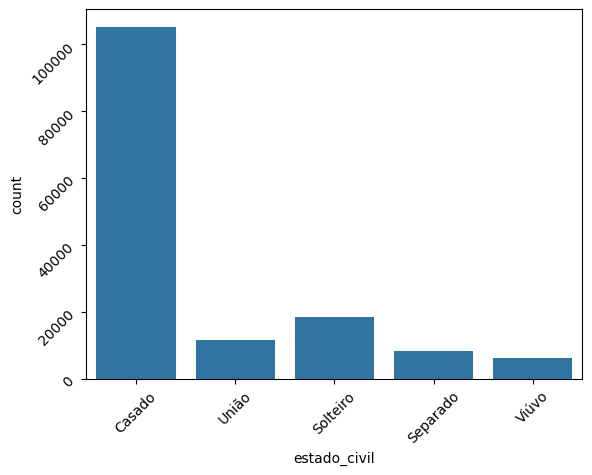

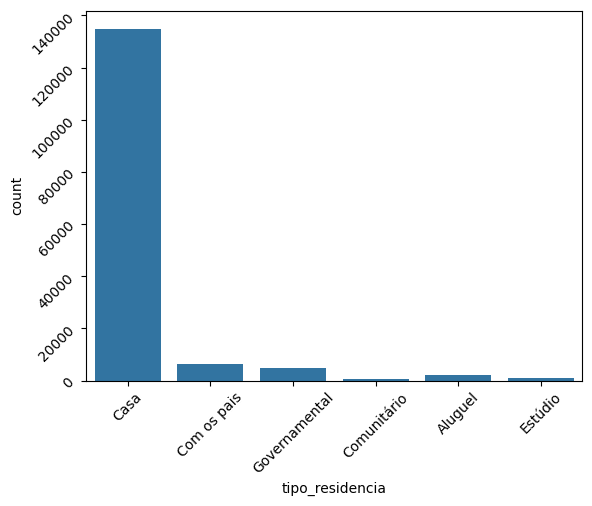

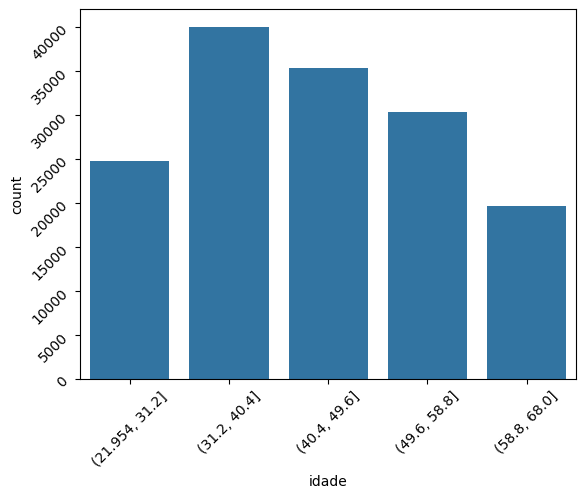

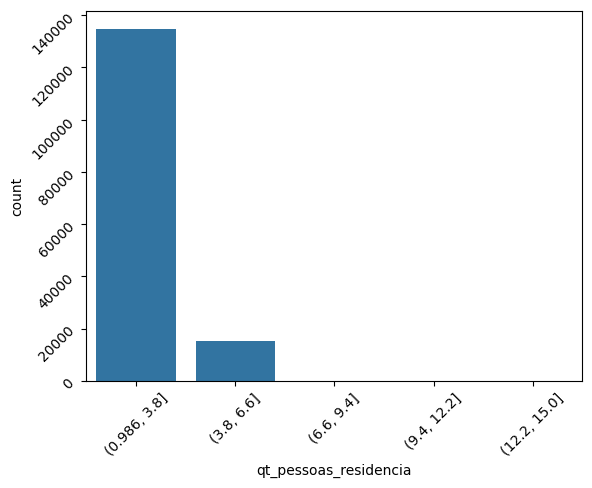

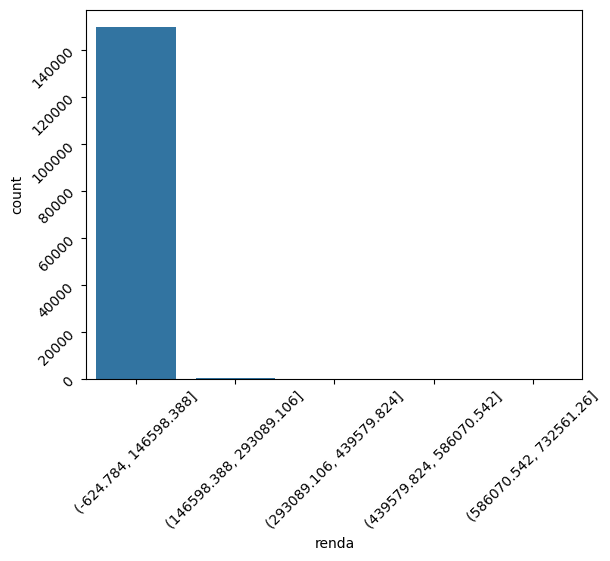

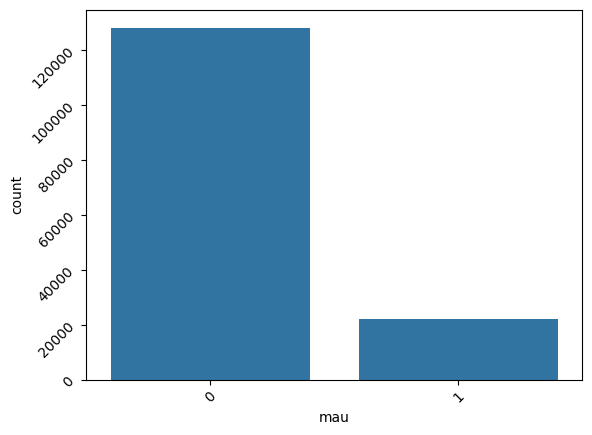

In [ ]:
for column in df.columns.drop('tempo_emprego'):
  plota1(column)

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [ ]:
# Descritiva bivariada

def plota(variavel, data=df_test.copy()):
  if((data[variavel].nunique()>5) and (data[variavel].dtype != object)):
    data[variavel] = pd.cut(data[variavel],5,duplicates='drop').copy()

  x,y = variavel, 'mau'
  df1 = data.groupby(x)[y].value_counts(normalize=True)
  df1 = df1.mul(100)
  df1 = df1.rename('percent').reset_index()
  df1

  g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
  g.ax.set_ylim(0,100)
  g.set_xticklabels(rotation=45)

  for p in g.ax.patches:
      txt = str(round(p.get_height(),2)) + '%'
      txt_x = p.get_x()
      txt_y = p.get_height()+0.5
      if(txt_x!=0):
        g.ax.text(txt_x,txt_y,txt)

<ipython-input-8-1f59b28e082c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = data.groupby(x)[y].value_counts(normalize=True)
<ipython-input-8-1f59b28e082c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = data.groupby(x)[y].value_counts(normalize=True)
<ipython-input-8-1f59b28e082c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1 = data.groupby(x)[y].value_counts(normalize=True)
<ipython-input-8-1f59b

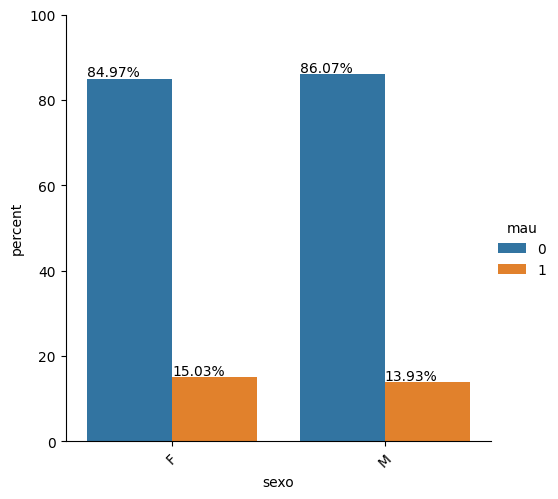

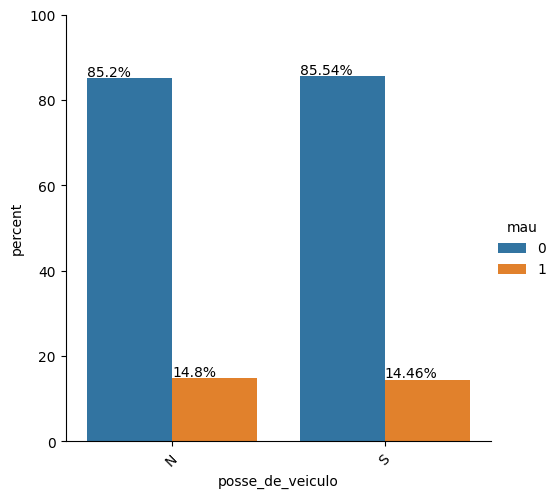

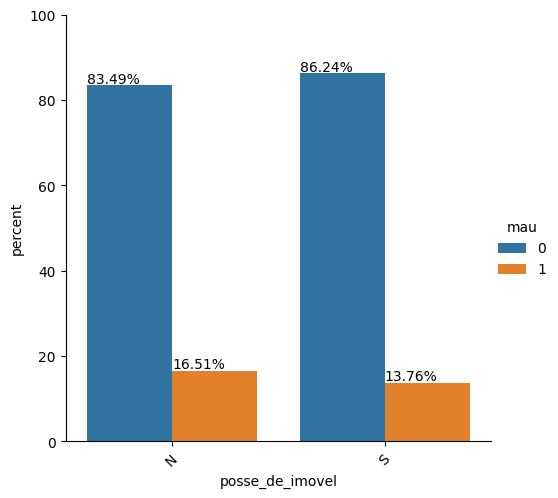

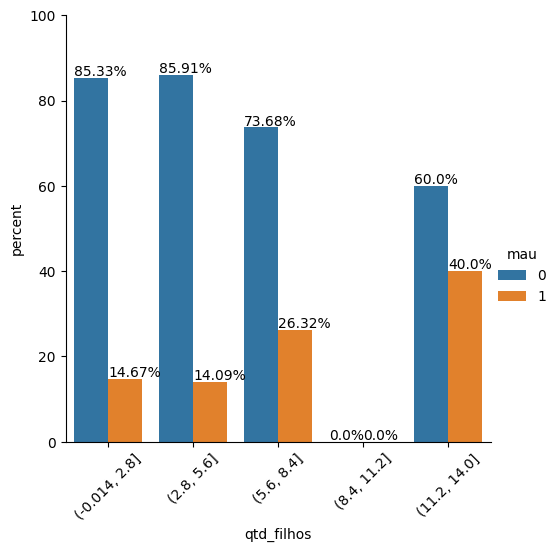

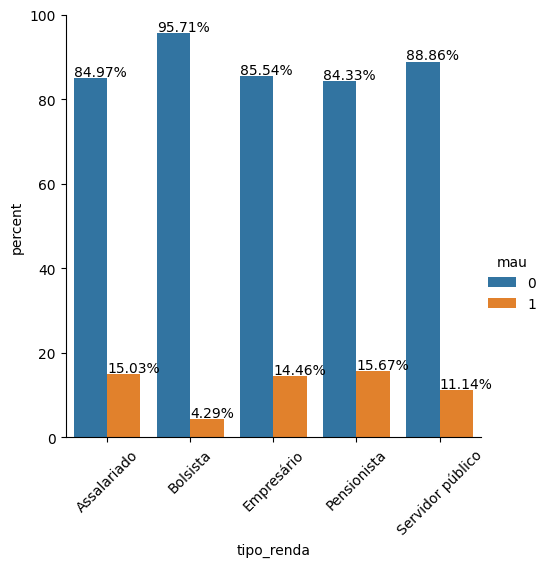

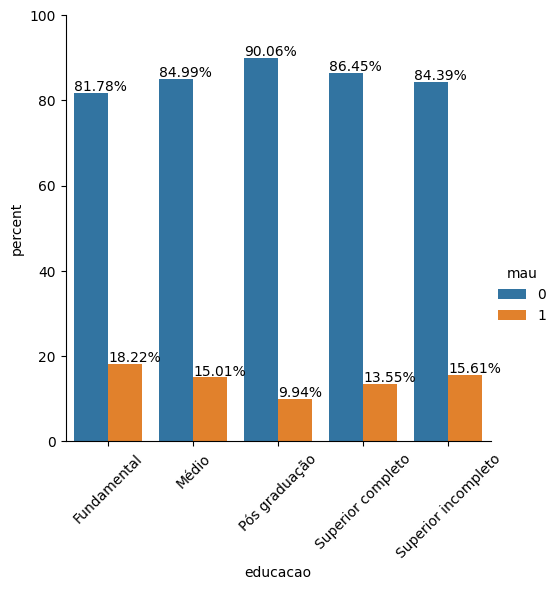

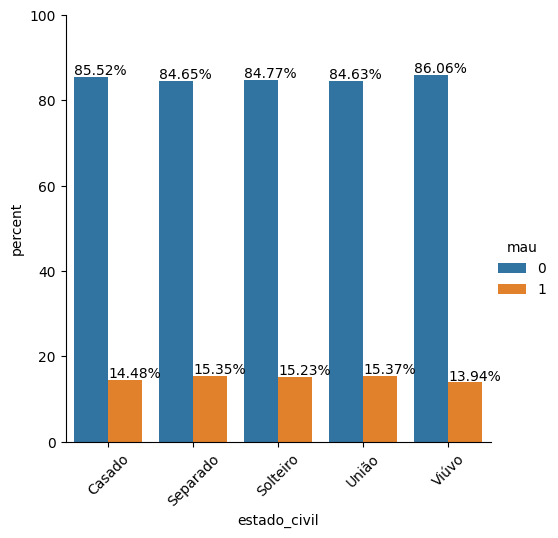

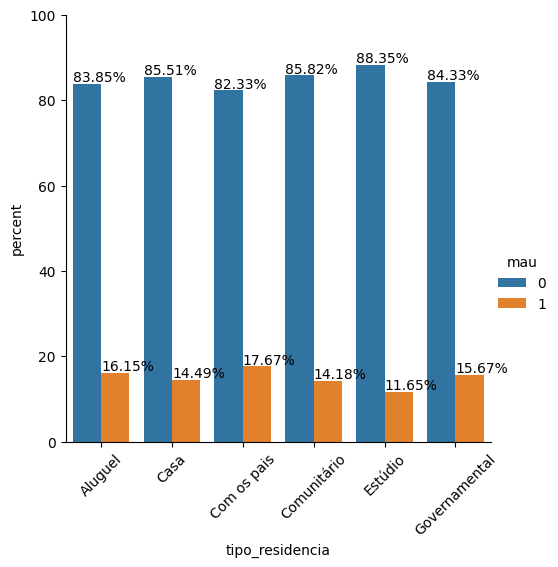

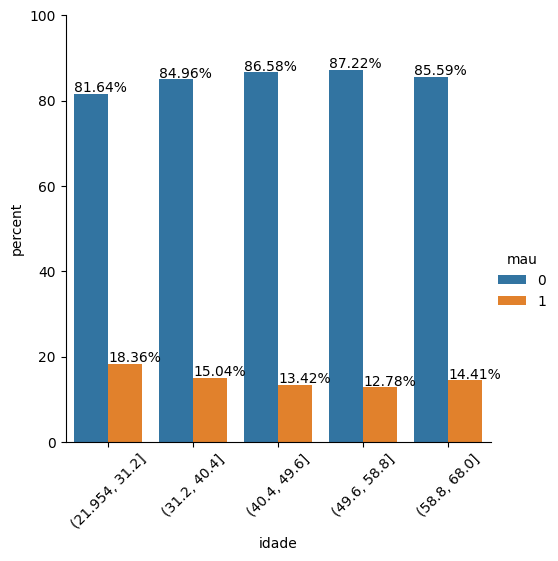

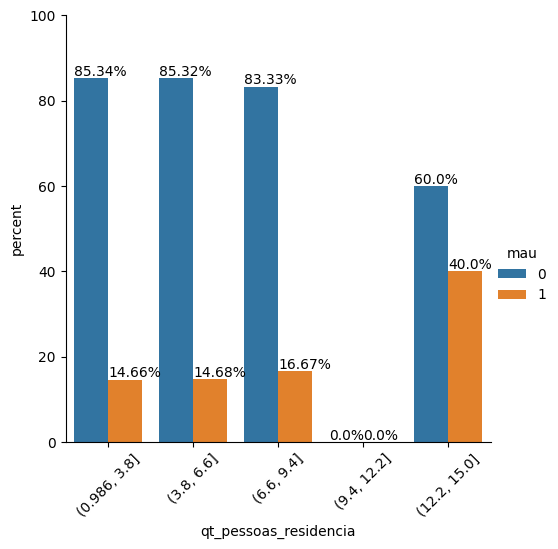

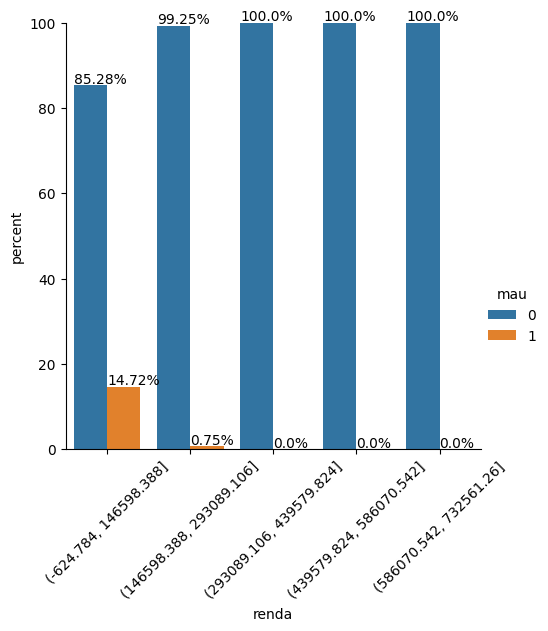

In [ ]:
for column in df.columns.drop(['mau','tempo_emprego']):
  plota(column)

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [ ]:
# Identificando e tratando missings

df_train.isna().sum()

,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0
tipo_residencia,0
idade,0
tempo_emprego,100875


In [ ]:
media = df_train['tempo_emprego'].mean()
df_train.fillna(media, inplace=True)
df_train.isna().sum()

<ipython-input-11-82bdf9ecead5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.fillna(media, inplace=True)


,0
sexo,0
posse_de_veiculo,0
posse_de_imovel,0
qtd_filhos,0
tipo_renda,0
educacao,0
estado_civil,0
tipo_residencia,0
idade,0
tempo_emprego,0


In [ ]:
# Fazendo um metadados

metadados = pd.DataFrame(df_train.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df_train.nunique()
metadados['papel'] = 'covariavel'
metadados.loc['mau','papel'] = 'resposta'
metadados

,dtype,valores_unicos,papel
sexo,object,2,covariavel
posse_de_veiculo,object,2,covariavel
posse_de_imovel,object,2,covariavel
qtd_filhos,int64,8,covariavel
tipo_renda,object,5,covariavel
educacao,object,5,covariavel
estado_civil,object,5,covariavel
tipo_residencia,object,6,covariavel
idade,int64,47,covariavel
tempo_emprego,float64,3005,covariavel


In [ ]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]

    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [ ]:
for var in metadados[metadados.papel=='covariavel'].index:
    if  (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df_train[var],5,duplicates='drop'), df_train.mau)
    else:
        metadados.loc[var, 'IV'] = IV(df_train[var], df_train.mau)


metadados

,dtype,valores_unicos,papel,IV
sexo,object,2,covariavel,0.002665
posse_de_veiculo,object,2,covariavel,0.000075
posse_de_imovel,object,2,covariavel,0.009690
qtd_filhos,int64,8,covariavel,0.000055
tipo_renda,object,5,covariavel,0.009718
educacao,object,5,covariavel,0.003690
estado_civil,object,5,covariavel,0.001305
tipo_residencia,object,6,covariavel,0.003330
idade,int64,47,covariavel,0.018434
tempo_emprego,float64,3005,covariavel,0.283956


Vamos usar as seguintes variáveis: tipo_renda, posse_de_imovel, idade, tempo_emprego, educacao e renda para tentar prever mau.

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics

formula = '''mau ~ tipo_renda + posse_de_imovel + idade + tempo_emprego + renda + educacao'''
rl = smf.glm(formula, data=df_train, family=sm.families.Binomial()).fit()

rl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    mau   No. Observations:               600000
Model:                            GLM   Df Residuals:                   599987
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.2494e+05
Date:                Mon, 23 Sep 2024   Deviance:                   2.4975e+05
Time:                        20:36:11   Pearson chi2:                 1.66e+16
No. Iterations:                    11   Pseudo R-squ. (CS):            0.04243
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -1.5139      0.055    -27.319      0.000      -1.623      -1.405
tipo_renda[T.Bolsista]              0.1381      0.300      0.460      0.645      -0.450       0.726
tipo_renda[T.Empresário]           -0.0449      0.014     -3.219      0.001      -0.072      -0.018
tipo_renda[T.Pensionista]          -0.0310      0.020     -1.548      0.122      -0.070       0.008
tipo_renda[T.Servidor público]     -0.0282      0.023     -1.218      0.223      -0.074       0.017
posse_de_imovel[T.S]               -0.0836      0.012     -7.234      0.000      -0.106      -0.061
educacao[T.Médio]                  -0.0206      0.049     -0.425      0.671      -0.116       0.075
educacao[T.Pós graduação]          -0.0270      0.168     -0.161      0.872      -0.356       0.302
educacao[T.Superior completo]      -0.0734      0.050     -1.481      0.139      -0.171       0.024
educacao[T.Superior incompleto]    -0.0652      0.056     -1.173      0.241      -0.174       0.044
idade                               0.0005      0.001      0.729      0.466      -0.001       0.002
tempo_emprego                      -0.0233      0.002    -12.992      0.000      -0.027      -0.020
renda                              -0.0001   1.08e-06    -94.597      0.000      -0.000      -0.000
===================================================================================================
"""

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [ ]:
df_test.reset_index(inplace=True)

In [ ]:
from scipy.stats import ks_2samp

df_train['score'] = rl.predict(df_train)

# Acurácia
acc = metrics.accuracy_score(df_train.mau, df_train.score>.068)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df_train.mau, df_train.score)
auc = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc -1
ks = ks_2samp(df_train.loc[df_train.mau == 1, 'score'], df_train.loc[df_train.mau != 1, 'score']).statistic

print('Acurácia: {0:.1%} \nAUC: {1:.1%} \nGINI: {2:.1%}\nKS: {3:.1%}'
      .format(acc, auc, gini, ks))

<ipython-input-17-9fcceab16287>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['score'] = rl.predict(df_train)


Acurácia: 59.2% 
AUC: 76.7% 
GINI: 53.3%
KS: 39.5%


# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento

## Pré processamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Separar as variáveis independentes e a variável resposta
x = df.drop(columns=['mau']) # Variáveis independentes
y = df['mau'] # Variável resposta (target)

# Balanceando o dataset
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

In [ ]:
# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Listas de variáveis categóricas e numéricas
variaveis_cat = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']
variaveis_num = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

In [ ]:
# Pipeline para o processamento das variáveis categóricas

transf_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # substitui valores nulos pela moda
    ('onehot', OneHotEncoder(drop='first'))
])

# Pipeline para o processamento das variáveis numéricas

transf_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Criação do pré-processador

preprocessor = ColumnTransformer(transformers = [
    ('num', transf_num, variaveis_num),
    ('cat', transf_cat, variaveis_cat)
])

# Construção do pipeline final

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components = 5)),
    ('classifier', LogisticRegression())
])

In [ ]:
# Treinamento
pipeline.fit(x_train, y_train)

# Predição
y_pred = pipeline.predict(x_test)
y_pred_prob = pipeline.predict_proba(x_test)[:,1]

# Acurácia
acc = metrics.accuracy_score(y_test, y_pred)
#AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
auc = metrics.auc(fpr, tpr)

print('Acurácia: {0:.1%} \nAUC: {1:.1%}'
      .format(acc, auc))

Acurácia: 69.0% 
AUC: 76.5%


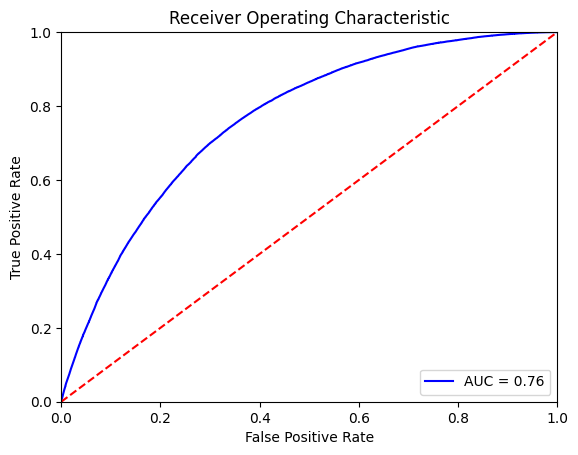

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

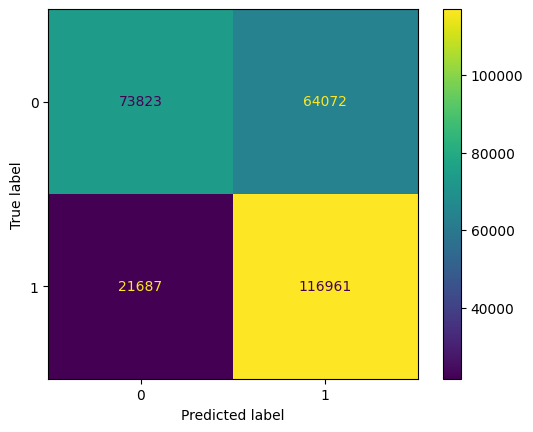

In [ ]:
cf = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, y_pred))
cf.plot();

# b - Pycaret na base de dados

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



In [ ]:
#pip install pycaret

In [ ]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [ ]:
from pycaret.classification import *

In [ ]:
pycsetup = setup(data = df, target = 'mau', experiment_name='credit_1',
                  normalize=True, normalize_method='zscore',
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)

,Description,Value
0,Session id,6870
1,Target,mau
2,Target type,Binary
3,Original data shape,"(750000, 15)"
4,Transformed data shape,"(1192900, 34)"
5,Transformed train set shape,"(967900, 34)"
6,Transformed test set shape,"(225000, 34)"
7,Numeric features,6
8,Date features,1
9,Categorical features,7


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
lgbm = create_model('lightgbm', fold=2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9097,0.7756,0.1703,0.3437,0.2277,0.1855,0.1985
1,0.9120,0.7786,0.1590,0.3583,0.2202,0.1809,0.1978
Mean,0.9108,0.7771,0.1646,0.3510,0.2240,0.1832,0.1982
Std,0.0011,0.0015,0.0057,0.0073,0.0037,0.0023,0.0004


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

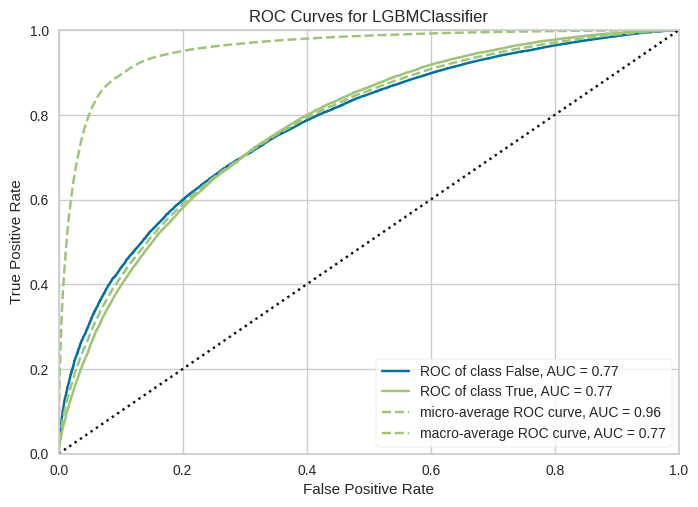

In [ ]:
plot_model(lgbm, plot='auc')

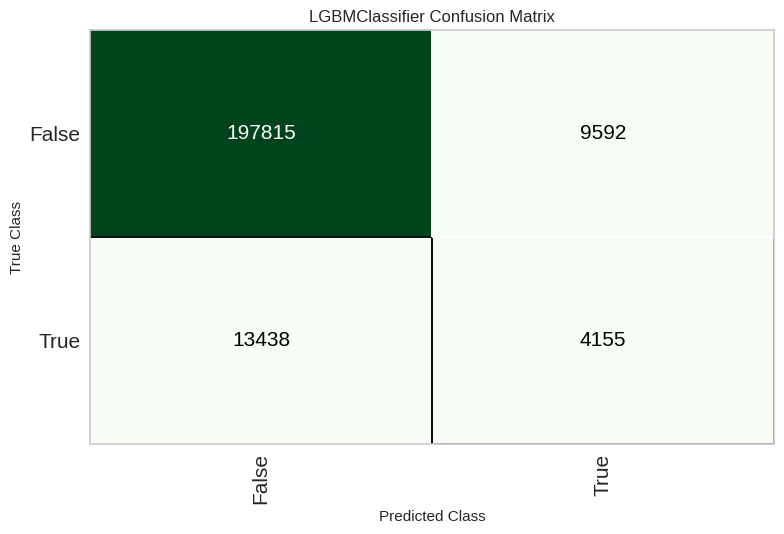

In [ ]:
plot_model(lgbm, plot = 'confusion_matrix')

In [ ]:
save_model(lgbm, 'model_lgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['data_ref'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['index', 'qtd_filhos', 'idade',
                                              'tempo_emprego',
                                              'qt_pessoas_residencia', 'renda'],
                                     transformer=Sim...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_ra